https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a



In [1]:
import pandas as pd
import numpy as np

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [4]:
import string

nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [6]:
pip install unidecode textstat

     |████████████████████████████████| 245kB 12.8MB/s 
     |████████████████████████████████| 102kB 8.8MB/s 
     |████████████████████████████████| 1.9MB 27.5MB/s 


In [7]:
# The labeled training data
df = pd.read_csv("https://drive.google.com/uc?export=download&id=1dzzVbgHphbCf7kvq9IKiIhwzmxPbuH4s")

In [8]:
df.head()

,loan_id,en_clean,defaulted
0,7779,She opened a colmado out of the side of her ho...,0
1,2777,(First Loan): Joffre continues to run his loc...,1
2,6007,"Dina Santana is the mother of two children, Ju...",0
3,76,"Rosemary is 50 years old, single, and has 6 ch...",1
4,4217,"Segundo has a shop where he sells animal feed,...",0


In [9]:
df.shape

(6138, 3)

In [10]:
df = df.drop_duplicates('en_clean')
df.shape

(6129, 3)

In [11]:
import spacy
from spacy import displacy
nlp = spacy.load("en_core_web_sm")

# **EDA**

In [12]:
import matplotlib.pyplot as plt

In [13]:
df['Length'] = df['en_clean'].astype(str).apply(len)

In [14]:
df['Word_count'] = df['en_clean'].apply(lambda x: len(str(x).split()))

In [15]:
df.head()

,loan_id,en_clean,defaulted,Length,Word_count
0,7779,She opened a colmado out of the side of her ho...,0,680,119
1,2777,(First Loan): Joffre continues to run his loc...,1,734,126
2,6007,"Dina Santana is the mother of two children, Ju...",0,786,141
3,76,"Rosemary is 50 years old, single, and has 6 ch...",1,928,176
4,4217,"Segundo has a shop where he sells animal feed,...",0,907,169


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6129 entries, 0 to 6137
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   loan_id     6129 non-null   int64 
 1   en_clean    6129 non-null   object
 2   defaulted   6129 non-null   int64 
 3   Length      6129 non-null   int64 
 4   Word_count  6129 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 287.3+ KB


In [17]:
df['Word_count'].describe()

count    6129.000000
mean      152.584598
std        65.308365
min         1.000000
25%       112.000000
50%       144.000000
75%       184.000000
max       938.000000
Name: Word_count, dtype: float64

<Figure size 864x432 with 0 Axes>

Text(0.5, 0, 'Text Length')

Text(0.5, 1.0, 'Text Length Distribution')

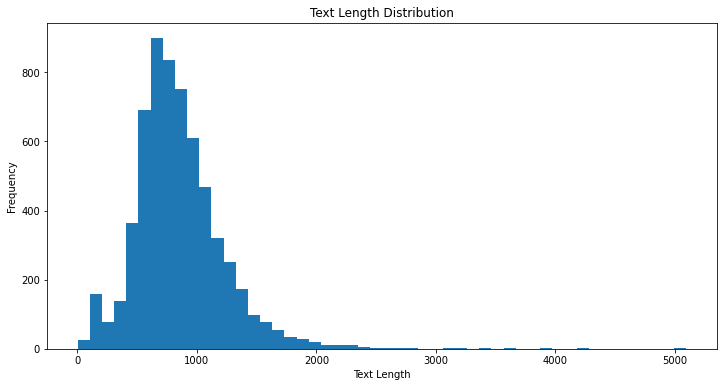

In [62]:
plt.figure(figsize=(12,6))

df['Length'].plot(kind='hist', bins=50)
plt.xlabel('Text Length')
plt.title('Text Length Distribution')

plt.savefig("Text Length Distribution.pdf")
plt.show()

In [63]:
from google.colab import files
files.download('Text Length Distribution.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 864x432 with 0 Axes>

Text(0.5, 0, 'Text Length')

Text(0.5, 1.0, 'Text Length Distribution for defaulted = 1')

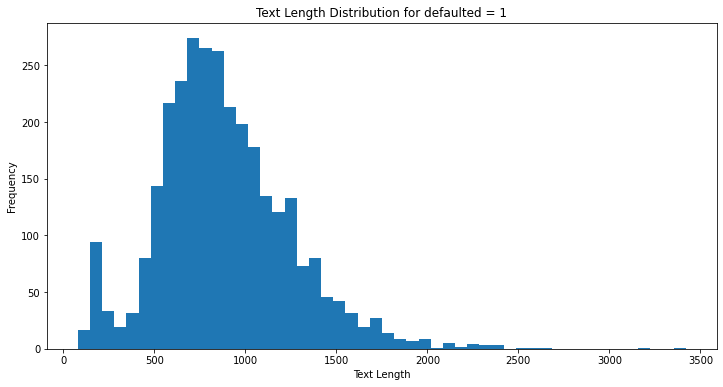

In [64]:
plt.figure(figsize=(12,6))

df[df['defaulted'] == 1]['Length'].plot(kind='hist', bins=50)
plt.xlabel('Text Length')
plt.title('Text Length Distribution for defaulted = 1')

plt.savefig("Text Length Distribution for defaulted = 1.pdf")
plt.show()

In [65]:
files.download("Text Length Distribution for defaulted = 1.pdf")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 864x432 with 0 Axes>

Text(0.5, 0, 'Text Length')

Text(0.5, 1.0, 'Text Length Distribution for defaulted = 0')

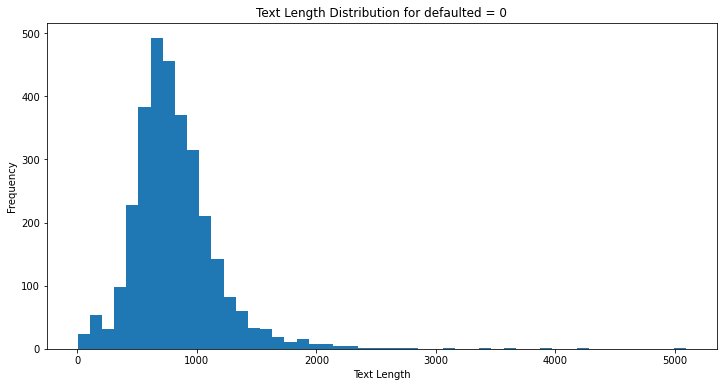

In [66]:
plt.figure(figsize=(12,6))

df[df['defaulted'] == 0]['Length'].plot(kind='hist', bins=50)
plt.xlabel('Text Length')
plt.title('Text Length Distribution for defaulted = 0')

plt.savefig("Text Length Distribution for defaulted = 0.pdf")
plt.show()

In [67]:
files.download("Text Length Distribution for defaulted = 0.pdf")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 864x432 with 0 Axes>

Text(0.5, 0, 'Word Count')

Text(0.5, 1.0, 'Text Word Count Distribution')

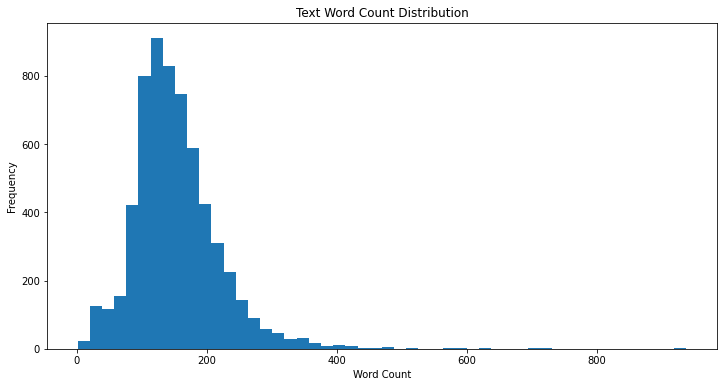

In [68]:
plt.figure(figsize=(12,6))

df['Word_count'].plot(kind='hist', bins=50)
plt.xlabel('Word Count')
plt.title('Text Word Count Distribution')

plt.savefig("Text Word Count Distribution.pdf")
plt.show()

In [69]:
files.download("Text Word Count Distribution.pdf")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

## **Top 20 words before and after removing stopwords**

In [23]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['en_clean'], 20)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['en_clean' , 'Word_count'])

to 39534
the 33537
her 33311
and 33105
she 29953
of 24741
is 22108
in 20432
has 11745
business 11375
for 10928
with 9774
loan 9634
he 9530
his 9212
that 7051
children 6933
will 6452
this 6260
from 6104


In [24]:
df1.head()

,en_clean,Word_count
0,to,39534
1,the,33537
2,her,33311
3,and,33105
4,she,29953


<Figure size 1296x432 with 0 Axes>

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Top 20 words before removing stop words')

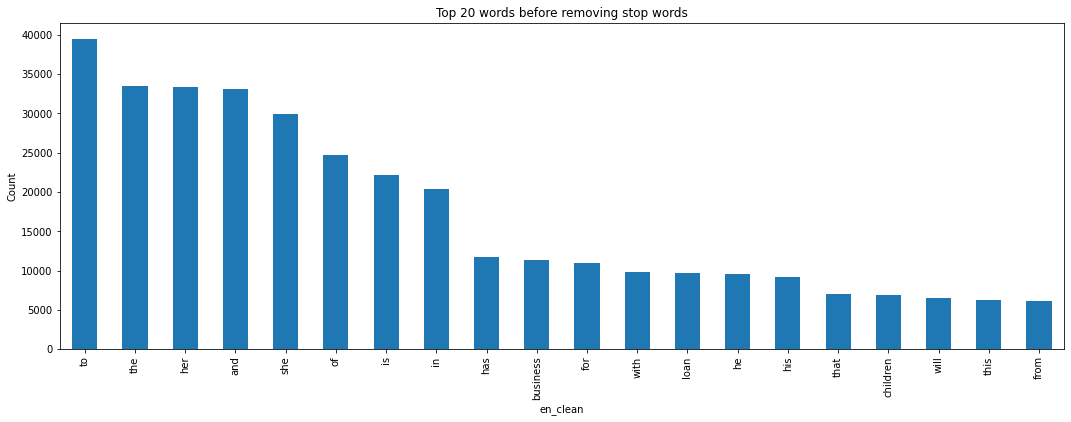

In [70]:
plt.figure(figsize=(18,6))

df1.groupby('en_clean').sum()['Word_count'].sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Count')
plt.title('Top 20 words before removing stop words')

plt.savefig("Top 20 words before removing stop words.pdf")
plt.show()

In [71]:
files.download("Top 20 words before removing stop words.pdf")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['en_clean'], 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['en_clean' , 'Word_count'])


business 11375
loan 9634
children 6933
years 5518
school 4200
old 3720
buy 3683
able 3433
group 3359
family 3211
sells 3064
small 2624
income 2468
husband 2438
married 2414
products 2297
selling 2197
home 2095
purchase 2085
community 2080


<Figure size 1296x432 with 0 Axes>

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Top 20 words after removing stop words')

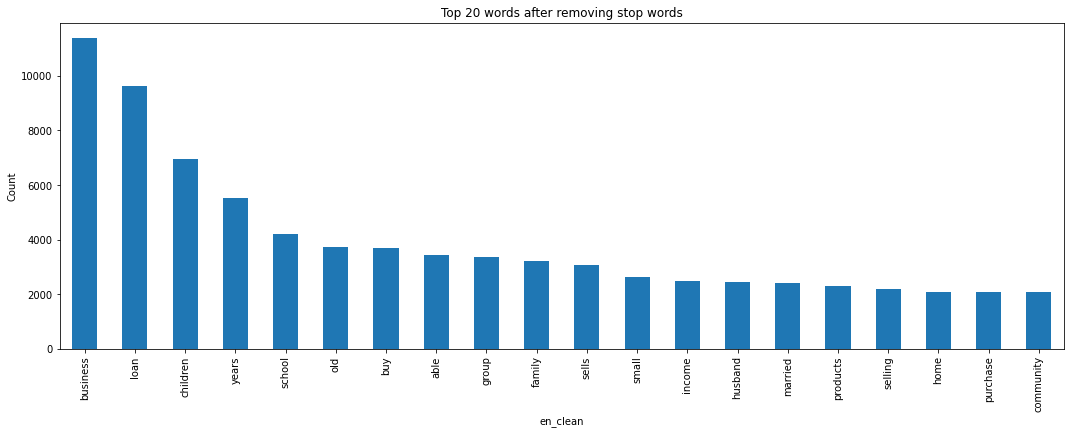

In [72]:
plt.figure(figsize=(18,6))

df2.groupby('en_clean').sum()['Word_count'].sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Count')
plt.title('Top 20 words after removing stop words')

plt.savefig("Top 20 words after removing stop words.pdf")
plt.show()

In [73]:
files.download("Top 20 words after removing stop words.pdf")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Top 20 words after removing stop words in defaulted = 0**

In [28]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words3 = get_top_n_words(df[df['defaulted'] == 0]['en_clean'], 20)
for word, freq in common_words3:
    print(word, freq)
df3 = pd.DataFrame(common_words3, columns = ['en_clean' , 'Word_count'])


business 5671
loan 4367
children 3318
years 2678
old 1765
able 1683
group 1652
buy 1638
sells 1521
small 1503
school 1460
husband 1413
products 1326
family 1326
community 1305
home 1263
selling 1187
help 1161
store 1119
started 1040


<Figure size 1296x432 with 0 Axes>

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Top 20 words after removing stop words for defaulted = 0')

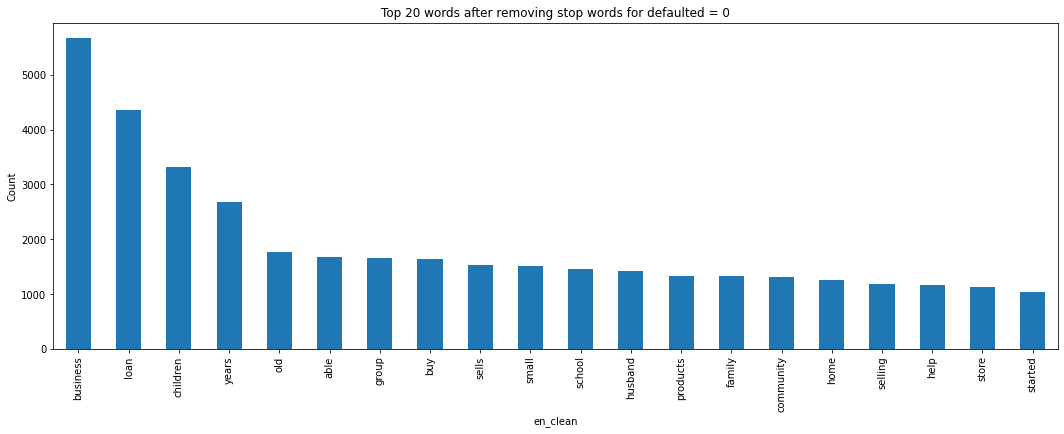

In [74]:
plt.figure(figsize=(18,6))

df3.groupby('en_clean').sum()['Word_count'].sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Count')
plt.title('Top 20 words after removing stop words for defaulted = 0')

plt.savefig("Top 20 words after removing stop words for defaulted = 0.pdf")
plt.show()

In [75]:
files.download("Top 20 words after removing stop words for defaulted = 0.pdf")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Top 20 words after removing stop words in defaulted = 1**

In [30]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words4 = get_top_n_words(df[df['defaulted'] == 1]['en_clean'], 20)
for word, freq in common_words4:
    print(word, freq)
df4 = pd.DataFrame(common_words4, columns = ['en_clean' , 'Word_count'])

business 5704
loan 5267
children 3615
years 2840
school 2740
buy 2045
old 1955
family 1885
able 1750
group 1707
married 1571
income 1548
sells 1543
purchase 1209
small 1121
husband 1025
selling 1010
products 971
stock 955
needs 953


<Figure size 1296x432 with 0 Axes>

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Top 20 words after removing stop words for defaulted = 1')

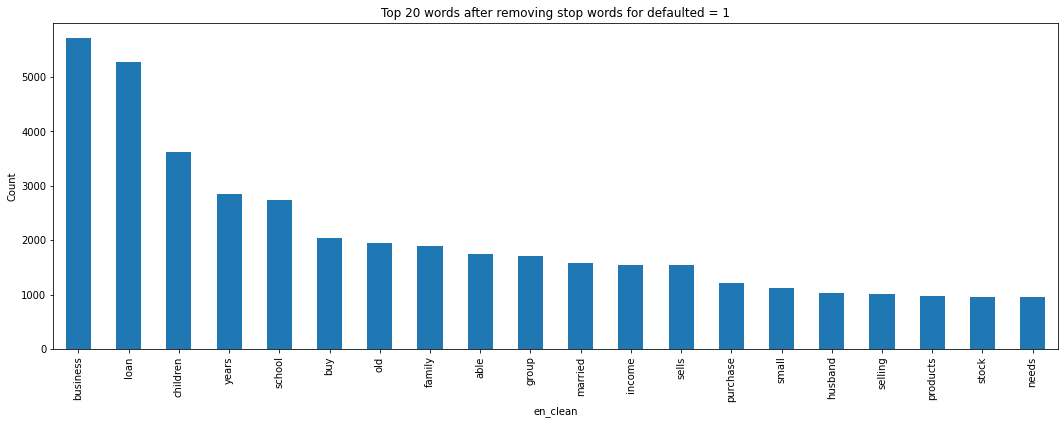

In [76]:
plt.figure(figsize=(18,6))

df4.groupby('en_clean').sum()['Word_count'].sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Count')
plt.title('Top 20 words after removing stop words for defaulted = 1')

plt.savefig("Top 20 words after removing stop words for defaulted = 1.pdf")
plt.show()

In [77]:
files.download("Top 20 words after removing stop words for defaulted = 1.pdf")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [32]:
# See if there are null values
df.isnull().sum()

loan_id       0
en_clean      0
defaulted     0
Length        0
Word_count    0
dtype: int64

In [33]:
pip install \
   nltk seaborn sklearn gensim pyldavis \
   wordcloud textblob spacy textstat

     |████████████████████████████████| 1.7MB 12.4MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyldavis: filename=pyLDAvis-3.3.1-cp37-none-any.whl size=136870 sha256=d6f83d4d13c4d7fc1b44ebdc7344793ac4823e8307a18a0be599a7dcf5d0165b
  Stored in directory: /root/.cache/pip/wheels/a0/9c/fc/c6e00689d35c82cf96a8adc70edfe7ba7904374fdac3240ac2
Successfully built pyldavis
ERROR: pyldavis 3.3.1 has requirement numpy>=1.20.0, but you'll have numpy 1.19.5 which is incompatible.
ERROR: pyldavis 3.3.1 has requirement pandas>=1.2.0, but you'll have pandas 1.1.5 which is incompatible.


In [34]:
import nltk
nltk.download('stopwords')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
import nltk
from nltk.stem import PorterStemmer
nltk.download('punkt')
nltk.download('wordnet')

def preprocess_news(df):
    corpus=[]
    stem=PorterStemmer()
    lem=WordNetLemmatizer()
    for news in df['en_clean']:
        words=[w for w in word_tokenize(news) if (w not in stop)]
        
        words=[lem.lemmatize(w) for w in words if len(w)>2]
        
        corpus.append(words)
    return corpus

corpus=preprocess_news(df)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [36]:
dic=gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

NameError: ignored